# Tensorflow basis

## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [ ]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())

True
11


## Example 2


In [ ]:
# Example
import numpy as np
import tensorflow as tf

@tf.function
def add(a,b):
  return a + b

def sub(a,b):
  return a - b

a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [ ]:
# Write your code here
import numpy as np
import tensorflow as tf

@tf.function
def elem_mult(a, b, c):
    y = tf.multiply(a, b) + c
    return y

a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0]])
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])

result = elem_mult(a, b, c)
print(result.numpy())

[[ 2.  6.]
 [12. 20.]]


In [ ]:
import numpy as np
import tensorflow as tf

def elem_mult(a, b, c):
  y = np.multiply(a, b) + c
  return y


a = np.array([[1, 2], [3, 4]],dtype = np.int64)
b = np.array([[1, 2], [3, 4]],dtype = np.int64)
c = np.array([[1, 2], [3, 4]],dtype = np.int64)

print(elem_mult(a,b,c))

[[ 2  6]
 [12 20]]


# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y=f'(x)$. Use Tensoflow for derivative calculation.

[9. 4. 1. 0. 1. 4. 9.]
[-6. -4. -2.  0.  2.  4.  6.]


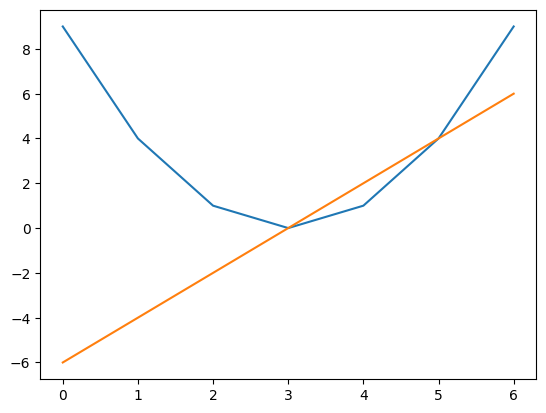

In [ ]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(f(x).numpy())
print(dfdx(x).numpy())

plt.plot(f(x))
plt.plot(dfdx(x))

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

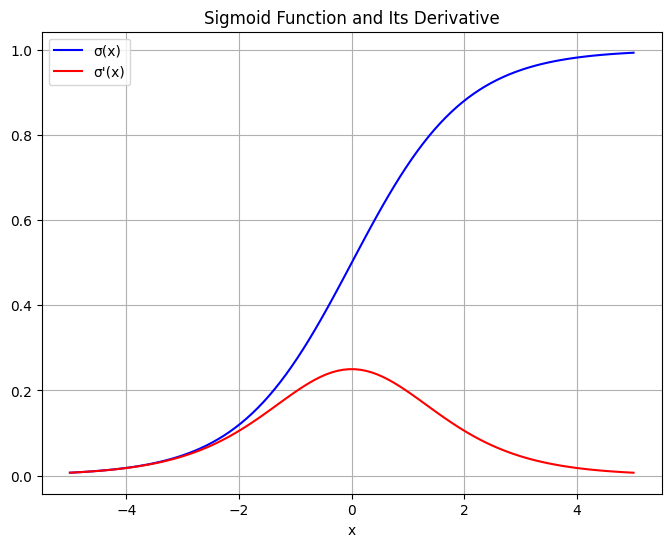

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Create a range of x values
x = tf.constant(np.linspace(-5, 5, 100), dtype=tf.float32)

# Compute the sigmoid values
y = sigmoid(x)

# Compute the sigmoid derivative values
y_derivative = sigmoid_derivative(x)

# Create a plot
plt.figure(figsize=(8, 6))

plt.plot(x.numpy(), y.numpy(), label='σ(x)', color='blue')
plt.plot(x.numpy(), y_derivative.numpy(), label="σ'(x)", color='red')

plt.title('Sigmoid Function and Its Derivative')
plt.xlabel('x')
plt.grid(True)
plt.legend()

plt.show()


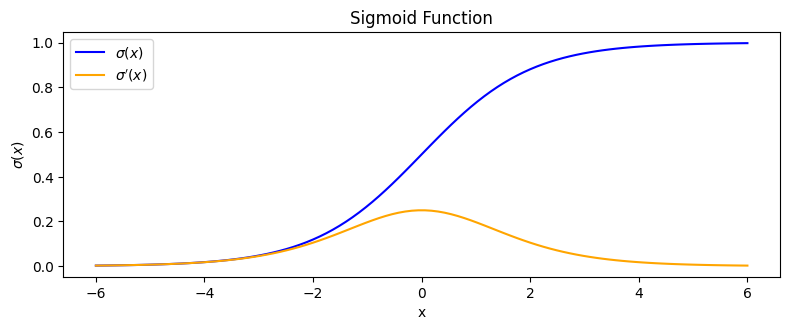

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Generate x values
x_values = np.linspace(-6, 6, 100)

# Convert to TensorFlow constants
x_tf = tf.constant(x_values, dtype=tf.float32)

# Use tf.GradientTape to calculate the gradient of the sigmoid function
with tf.GradientTape() as tape:
    tape.watch(x_tf)
    y_sigmoid = sigmoid(x_tf)

# Extract the gradient
y_derivative = tape.gradient(y_sigmoid, x_tf)

# Plot the sigmoid function and its derivative
plt.figure(figsize=(8, 6))

# Plot the sigmoid function
plt.subplot(2, 1, 1)
plt.plot(x_values, y_sigmoid.numpy(), label=r'$\sigma(x)$', color='blue')
plt.plot(x_values, y_derivative.numpy(), label=r"$\sigma'(x)$", color='orange')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.legend()

# # Plot the derivative of the sigmoid function
# plt.subplot(2, 1, 2)
# plt.plot(x_values, y_derivative.numpy(), label=r"$\sigma'(x)$", color='orange')
# plt.title("Derivative of Sigmoid Function")
# plt.xlabel('x')
# plt.ylabel(r"$\sigma'(x)$")
# plt.legend()

plt.tight_layout()
plt.show()


# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

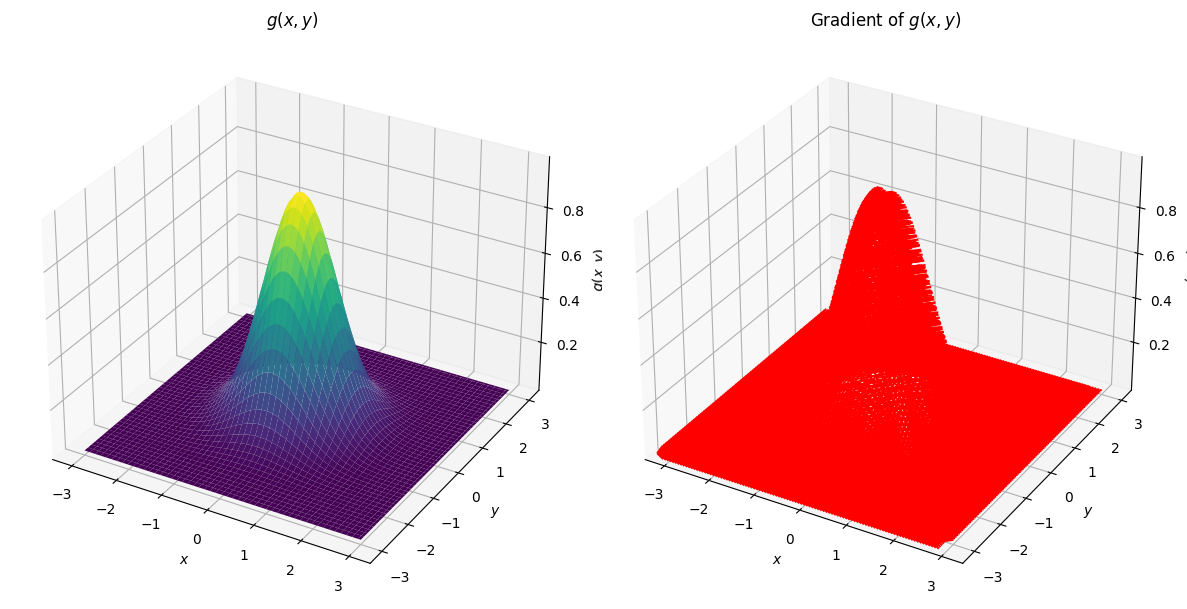

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given values
sigma_sq_value = 0.5
x_value = 1.0
y_value = 1.0

# Define the function
def g(x, y, sigma_sq):
    return tf.exp(-((x**2 + y**2) / (2 * sigma_sq)))

# Variables
x = tf.constant(x_value, dtype=tf.float32)
y = tf.constant(y_value, dtype=tf.float32)
sigma_sq = tf.constant(sigma_sq_value, dtype=tf.float32)

# Use GradientTape to calculate the gradient
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    tape.watch(y)
    g_value = g(x, y, sigma_sq)

# Calculate the gradient
gradient_x, gradient_y = tape.gradient(g_value, [x, y])

# Generate data for surface plot
x_values = np.linspace(-3, 3, 100)
y_values = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_values, y_values)
Z_function = g(X, Y, sigma_sq_value)

# Create a 3D surface plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z_function, cmap='viridis')
ax.set_title('$g(x, y)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x, y)$')

# Create a 3D quiver plot for the gradient
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.quiver(X, Y, Z_function, gradient_x.numpy(), gradient_y.numpy(), np.zeros_like(X), color='red')
ax.set_title('Gradient of $g(x, y)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x, y)$')

plt.tight_layout()
plt.show()


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Write your code here
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Write your code here
dataset = pd.read_csv("/content/iris-enc.csv")
dataset = np.asarray(dataset)
features = dataset[:,0:4]
labels = dataset[:,4:7]


In [ ]:
labels.shape

In [ ]:

train_x_norm = features / np.array([7.9,4.4,6.9,2.5])

# print(features)
# print(labels)
train_x_norm[:5]

In [ ]:
train_x_norm.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add the input layer (assuming input shape is 4 for example)
model.add(layers.Dense(64, activation='relu', input_shape=(4,)))

# Add the hidden layer
model.add(layers.Dense(128, activation='relu'))

# Add the output layer
model.add(layers.Dense(3, activation='softmax'))

# Display the model summary
model.summary()


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Assuming one-hot encoded labels
              metrics=['accuracy'])

In [ ]:
model.fit(train_x_norm, labels, epochs=100, batch_size=32)

In [ ]:
model.predict(train_x_norm[:4])


In [ ]:
labels[:5]

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
history = model.history
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

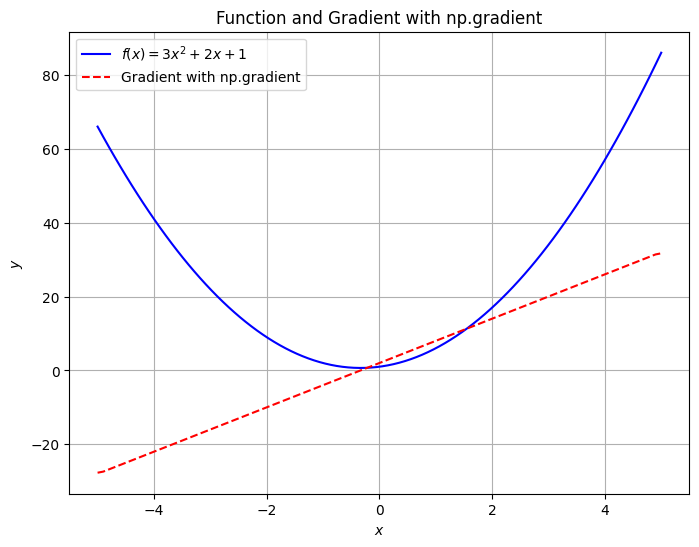

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 3 * x**2 + 2 * x + 1

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Calculate the function values
y_values = f(x_values)

# Use np.gradient to calculate the gradient
gradient_values = np.gradient(y_values, x_values)

# Plot the function and its gradient
plt.figure(figsize=(8, 6))

# Plot the function
plt.plot(x_values, y_values, label='$f(x) = 3x^2 + 2x + 1$', color='blue')

# Plot the gradient
plt.plot(x_values, gradient_values, label='Gradient with np.gradient', linestyle='--', color='red')

plt.title('Function and Gradient with np.gradient')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()
